In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

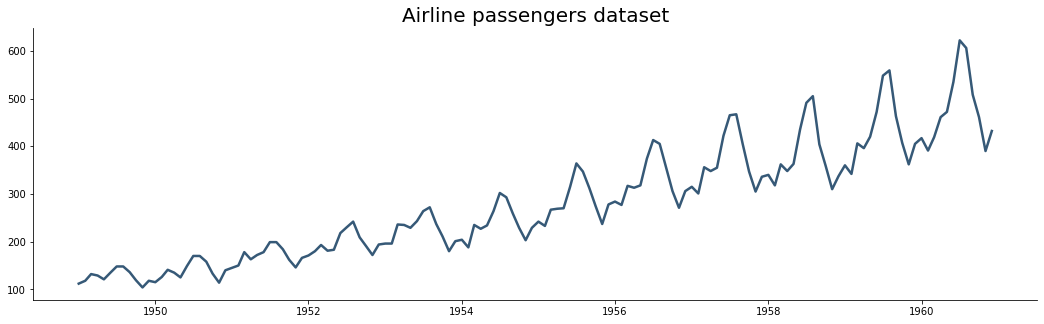

In [3]:
rcParams["figure.figsize"] = 18, 5
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.prop_cycle"] = cycler(color=["#365977"])
rcParams["lines.linewidth"] = 2.5

# Load
df = pd.read_csv("airline-passengers.csv", index_col="Month", parse_dates=True)
df.index.freq = "MS"

# Plot
plt.title("Airline passengers dataset", size=20)
plt.plot(df);

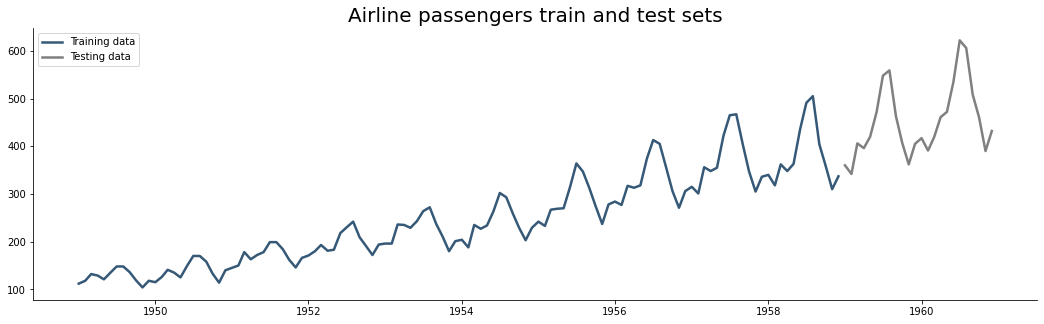

In [4]:
# Train/test split
df_train = df[:-24]
df_test = df[-24:]

# Plot
plt.title("Airline passengers train and test sets", size=20)
plt.plot(df_train["Passengers"], label="Training data")
plt.plot(df_test["Passengers"], color="gray", label="Testing data")
plt.legend();

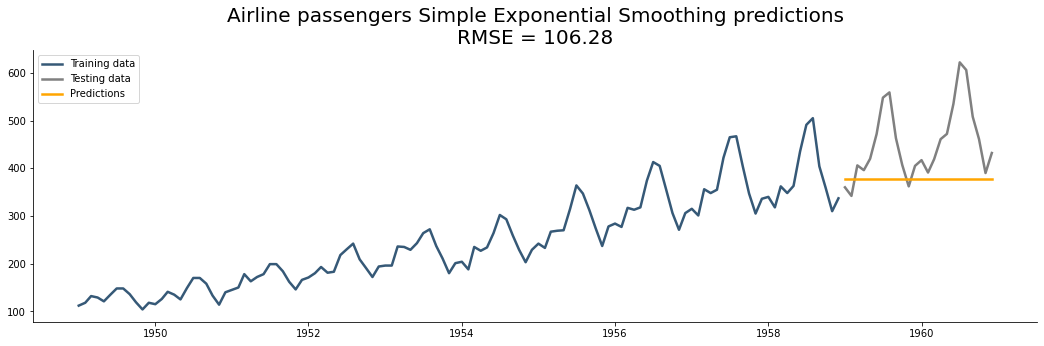

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 12
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(df_train["Passengers"])
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=24)

# Evaluate
rmse = mean_squared_error(df_test["Passengers"], predictions, squared=False)

# Plot
plt.title(
    f"Airline passengers Simple Exponential Smoothing predictions\nRMSE = {np.round(rmse, 2)}",
    size=20,
)
plt.plot(df_train["Passengers"], label="Training data")
plt.plot(df_test["Passengers"], color="gray", label="Testing data")
plt.plot(predictions, color="orange", label="Predictions")
plt.legend();

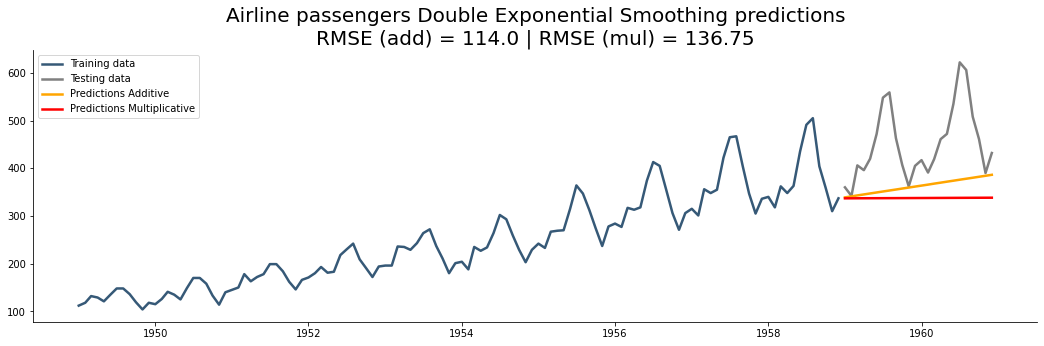

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Additive model
model_add = ExponentialSmoothing(df_train["Passengers"], trend="add")
results_add = model_add.fit()
predictions_add = results_add.forecast(steps=24)

# Multiplicative model
model_mul = ExponentialSmoothing(df_train["Passengers"], trend="mul")
results_mul = model_mul.fit()
predictions_mul = results_mul.forecast(steps=24)

# Evaluate
rmse_add = mean_squared_error(df_test["Passengers"], predictions_add, squared=False)
rmse_mul = mean_squared_error(df_test["Passengers"], predictions_mul, squared=False)

# Plot
plt.title(
    f"Airline passengers Double Exponential Smoothing predictions\nRMSE (add) = {np.round(rmse_add, 2)} | RMSE (mul) = {np.round(rmse_mul, 2)}",
    size=20,
)
plt.plot(df_train["Passengers"], label="Training data")
plt.plot(df_test["Passengers"], color="gray", label="Testing data")
plt.plot(predictions_add, color="orange", label="Predictions Additive")
plt.plot(predictions_mul, color="red", label="Predictions Multiplicative")
plt.legend();

C:\Users\hetia\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\hetia\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


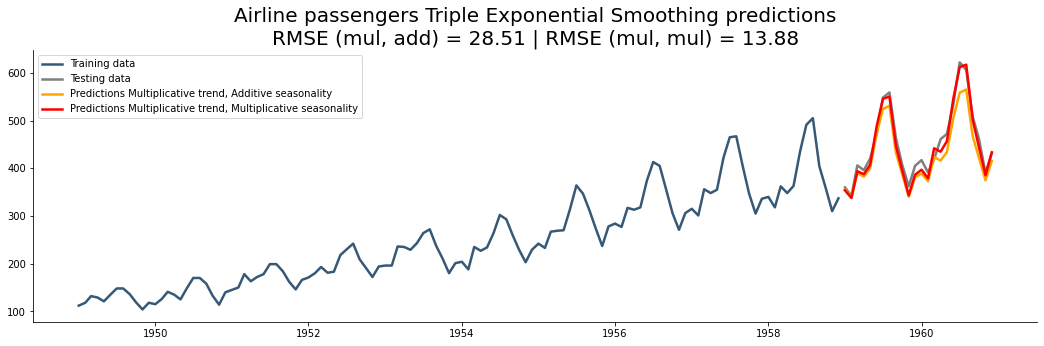

In [7]:
# Multiplicative trend / Additive seasonality model
model_mul_add = ExponentialSmoothing(
    df_train["Passengers"], trend="mul", seasonal="add", seasonal_periods=12
)
results_mul_add = model_mul_add.fit()
predictions_mul_add = results_mul_add.forecast(steps=24)

# Multiplicative trend / Multiplicative seasonality model
model_mul_mul = ExponentialSmoothing(
    df_train["Passengers"], trend="mul", seasonal="mul", seasonal_periods=12
)
results_mul_mul = model_mul_mul.fit()
predictions_mul_mul = results_mul_mul.forecast(steps=24)

# Evaluate
rmse_mul_add = mean_squared_error(
    df_test["Passengers"], predictions_mul_add, squared=False
)
rmse_mul_mul = mean_squared_error(
    df_test["Passengers"], predictions_mul_mul, squared=False
)

# Plot
plt.title(
    f"Airline passengers Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)} | RMSE (mul, mul) = {np.round(rmse_mul_mul, 2)}",
    size=20,
)
plt.plot(df_train["Passengers"], label="Training data")
plt.plot(df_test["Passengers"], color="gray", label="Testing data")
plt.plot(
    predictions_mul_add,
    color="orange",
    label="Predictions Multiplicative trend, Additive seasonality",
)
plt.plot(
    predictions_mul_mul,
    color="red",
    label="Predictions Multiplicative trend, Multiplicative seasonality",
)
plt.legend();

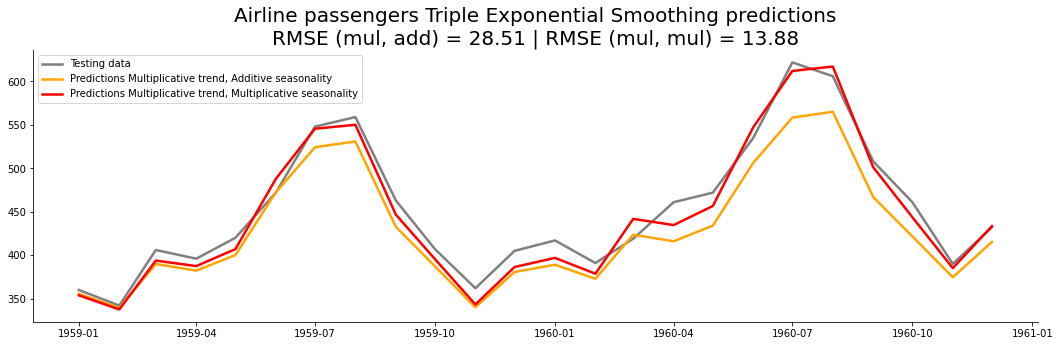

In [8]:
plt.title(
    f"Airline passengers Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)} | RMSE (mul, mul) = {np.round(rmse_mul_mul, 2)}",
    size=20,
)
plt.plot(df_test["Passengers"], color="gray", label="Testing data")
plt.plot(
    predictions_mul_add,
    color="orange",
    label="Predictions Multiplicative trend, Additive seasonality",
)
plt.plot(
    predictions_mul_mul,
    color="red",
    label="Predictions Multiplicative trend, Multiplicative seasonality",
)
plt.legend();